# **LIBRARIES**
---

In [1]:
import yaml
import os
import sys
import pandas as pd
import numpy as np
import math
import string
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

if os.path.basename(os.getcwd()) == 'notebooks':
    os.chdir('..')

if 'src' not in sys.path:
     sys.path.insert(0, 'src')


from modules.processing import DataLoader, OutlierHandler
from modules.feature_engineering import FeatureCreation, FeatureTransformation, FeatureSelection
from modules.imbalance_handler import ImbalanceHandler

pd.set_option('display.max_columns', None)

In [2]:

with open('config.yaml', 'r') as f:
    config = yaml.safe_load(f)

data_loader = DataLoader(paths=config['paths'])
df = data_loader.combine_datasets()

df.head()

,EstimatedSalary,Age,HasCrCard,IsActiveMember,Geography,Exited,Gender,Tenure,CreditScore,NumOfProducts,Balance
0,101348.88,42.0,1.0,1.0,France,1,Female,2,619,1,0.00
1,112542.58,41.0,0.0,1.0,Spain,0,Female,1,608,1,83807.86
2,113931.57,42.0,1.0,0.0,France,1,Female,8,502,3,159660.80
3,93826.63,39.0,0.0,0.0,France,0,Female,1,699,2,0.00
4,79084.10,43.0,1.0,1.0,Spain,0,Female,2,850,1,125510.82


In [3]:
df.describe()

,EstimatedSalary,Age,HasCrCard,IsActiveMember,Exited,Tenure,CreditScore,NumOfProducts,Balance
count,174465.000000,174465.000000,174465.000000,174465.000000,174465.000000,174465.000000,174465.000000,174465.000000,174465.000000
mean,111889.827283,38.172796,0.751285,0.498581,0.211515,5.019970,656.123303,1.553183,56640.165175
std,50792.711997,8.965630,0.432269,0.499999,0.408384,2.811105,81.112446,0.549288,62978.438169
min,11.580000,18.000000,0.000000,0.000000,0.000000,0.000000,350.000000,1.000000,0.000000
25%,73322.650000,32.000000,1.000000,0.000000,0.000000,3.000000,597.000000,1.000000,0.000000
50%,116971.050000,37.000000,1.000000,0.000000,0.000000,5.000000,659.000000,2.000000,0.000000
75%,154767.340000,42.000000,1.000000,1.000000,0.000000,7.000000,710.000000,2.000000,120727.170000
max,199992.480000,92.000000,1.000000,1.000000,1.000000,10.000000,850.000000,4.000000,250898.090000


# **HANDLING OUTLIERS**
---

In [4]:
# Outlier handling
outlier_cfg = config['preprocessing']['outlier_handling']
handler = OutlierHandler(
    iqr_multiplier=outlier_cfg['iqr_multiplier'],
    target_col=config['preprocessing']['target_column']
)

In [5]:
if outlier_cfg['enable']:
    df = handler.remove_outliers(
        df, 
        strategy=outlier_cfg['strategy'], 
        max_iter=outlier_cfg['max_iter'], 
        verbose=True
    )

Iteration 1: 7877 outliers
Iteration 2: 3398 outliers
Iteration 3: 0 outliers


# **FEATURE CREATION**
---

In [6]:
# Feature creation
if config['feature_engineering']['creation']:
    creator = FeatureCreation()
    df = creator.create(df)

print("=== Final DataFrame shape:", df.shape, "===")
print("Columns:", df.columns.tolist())
display(df.head())

=== Final DataFrame shape: (163254, 17) ===
Columns: ['EstimatedSalary', 'Age', 'HasCrCard', 'IsActiveMember', 'Geography', 'Exited', 'Gender', 'Tenure', 'CreditScore', 'NumOfProducts', 'Balance', 'Age_Category', 'Credit_Score_Range', 'Balance_Salary_Ratio', 'Geo_Gender', 'Total_Products_Used', 'Tp_Gender']


,EstimatedSalary,Age,HasCrCard,IsActiveMember,Geography,Exited,Gender,Tenure,CreditScore,NumOfProducts,Balance,Age_Category,Credit_Score_Range,Balance_Salary_Ratio,Geo_Gender,Total_Products_Used,Tp_Gender
0,101348.88,42.0,1.0,1.0,France,1,Female,2,619,1,0.00,40-50,600-700,0.000000,France_Female,2.0,2.0_Female
1,112542.58,41.0,0.0,1.0,Spain,0,Female,1,608,1,83807.86,40-50,600-700,0.744677,Spain_Female,1.0,1.0_Female
2,113931.57,42.0,1.0,0.0,France,1,Female,8,502,3,159660.80,40-50,300-600,1.401375,France_Female,4.0,4.0_Female
3,93826.63,39.0,0.0,0.0,France,0,Female,1,699,2,0.00,30-40,600-700,0.000000,France_Female,2.0,2.0_Female
4,79084.10,43.0,1.0,1.0,Spain,0,Female,2,850,1,125510.82,40-50,900+,1.587055,Spain_Female,2.0,2.0_Female


In [7]:
df.describe()

,EstimatedSalary,Age,HasCrCard,IsActiveMember,Exited,Tenure,CreditScore,NumOfProducts,Balance,Balance_Salary_Ratio,Total_Products_Used
count,163254.000000,163254.000000,163254.000000,163254.000000,163254.000000,163254.000000,163254.000000,163254.000000,163254.000000,163254.000000,163254.000000
mean,112173.519889,36.735631,0.752459,0.489630,0.194182,5.024741,656.663077,1.552097,56065.942018,2.226526,2.304556
std,50694.706576,6.947496,0.431585,0.499894,0.395571,2.808167,80.246494,0.529611,62894.125467,95.767097,0.686175
min,11.580000,19.000000,0.000000,0.000000,0.000000,0.000000,428.000000,1.000000,0.000000,0.000000,1.000000
25%,73686.750000,32.000000,1.000000,0.000000,0.000000,3.000000,597.000000,1.000000,0.000000,0.000000,2.000000
50%,117323.310000,36.000000,1.000000,0.000000,0.000000,5.000000,659.000000,2.000000,0.000000,0.000000,2.000000
75%,154907.095000,41.000000,1.000000,1.000000,0.000000,7.000000,710.000000,2.000000,120193.420000,0.990522,3.000000
max,199992.480000,54.000000,1.000000,1.000000,1.000000,10.000000,850.000000,3.000000,250898.090000,12863.795089,4.000000


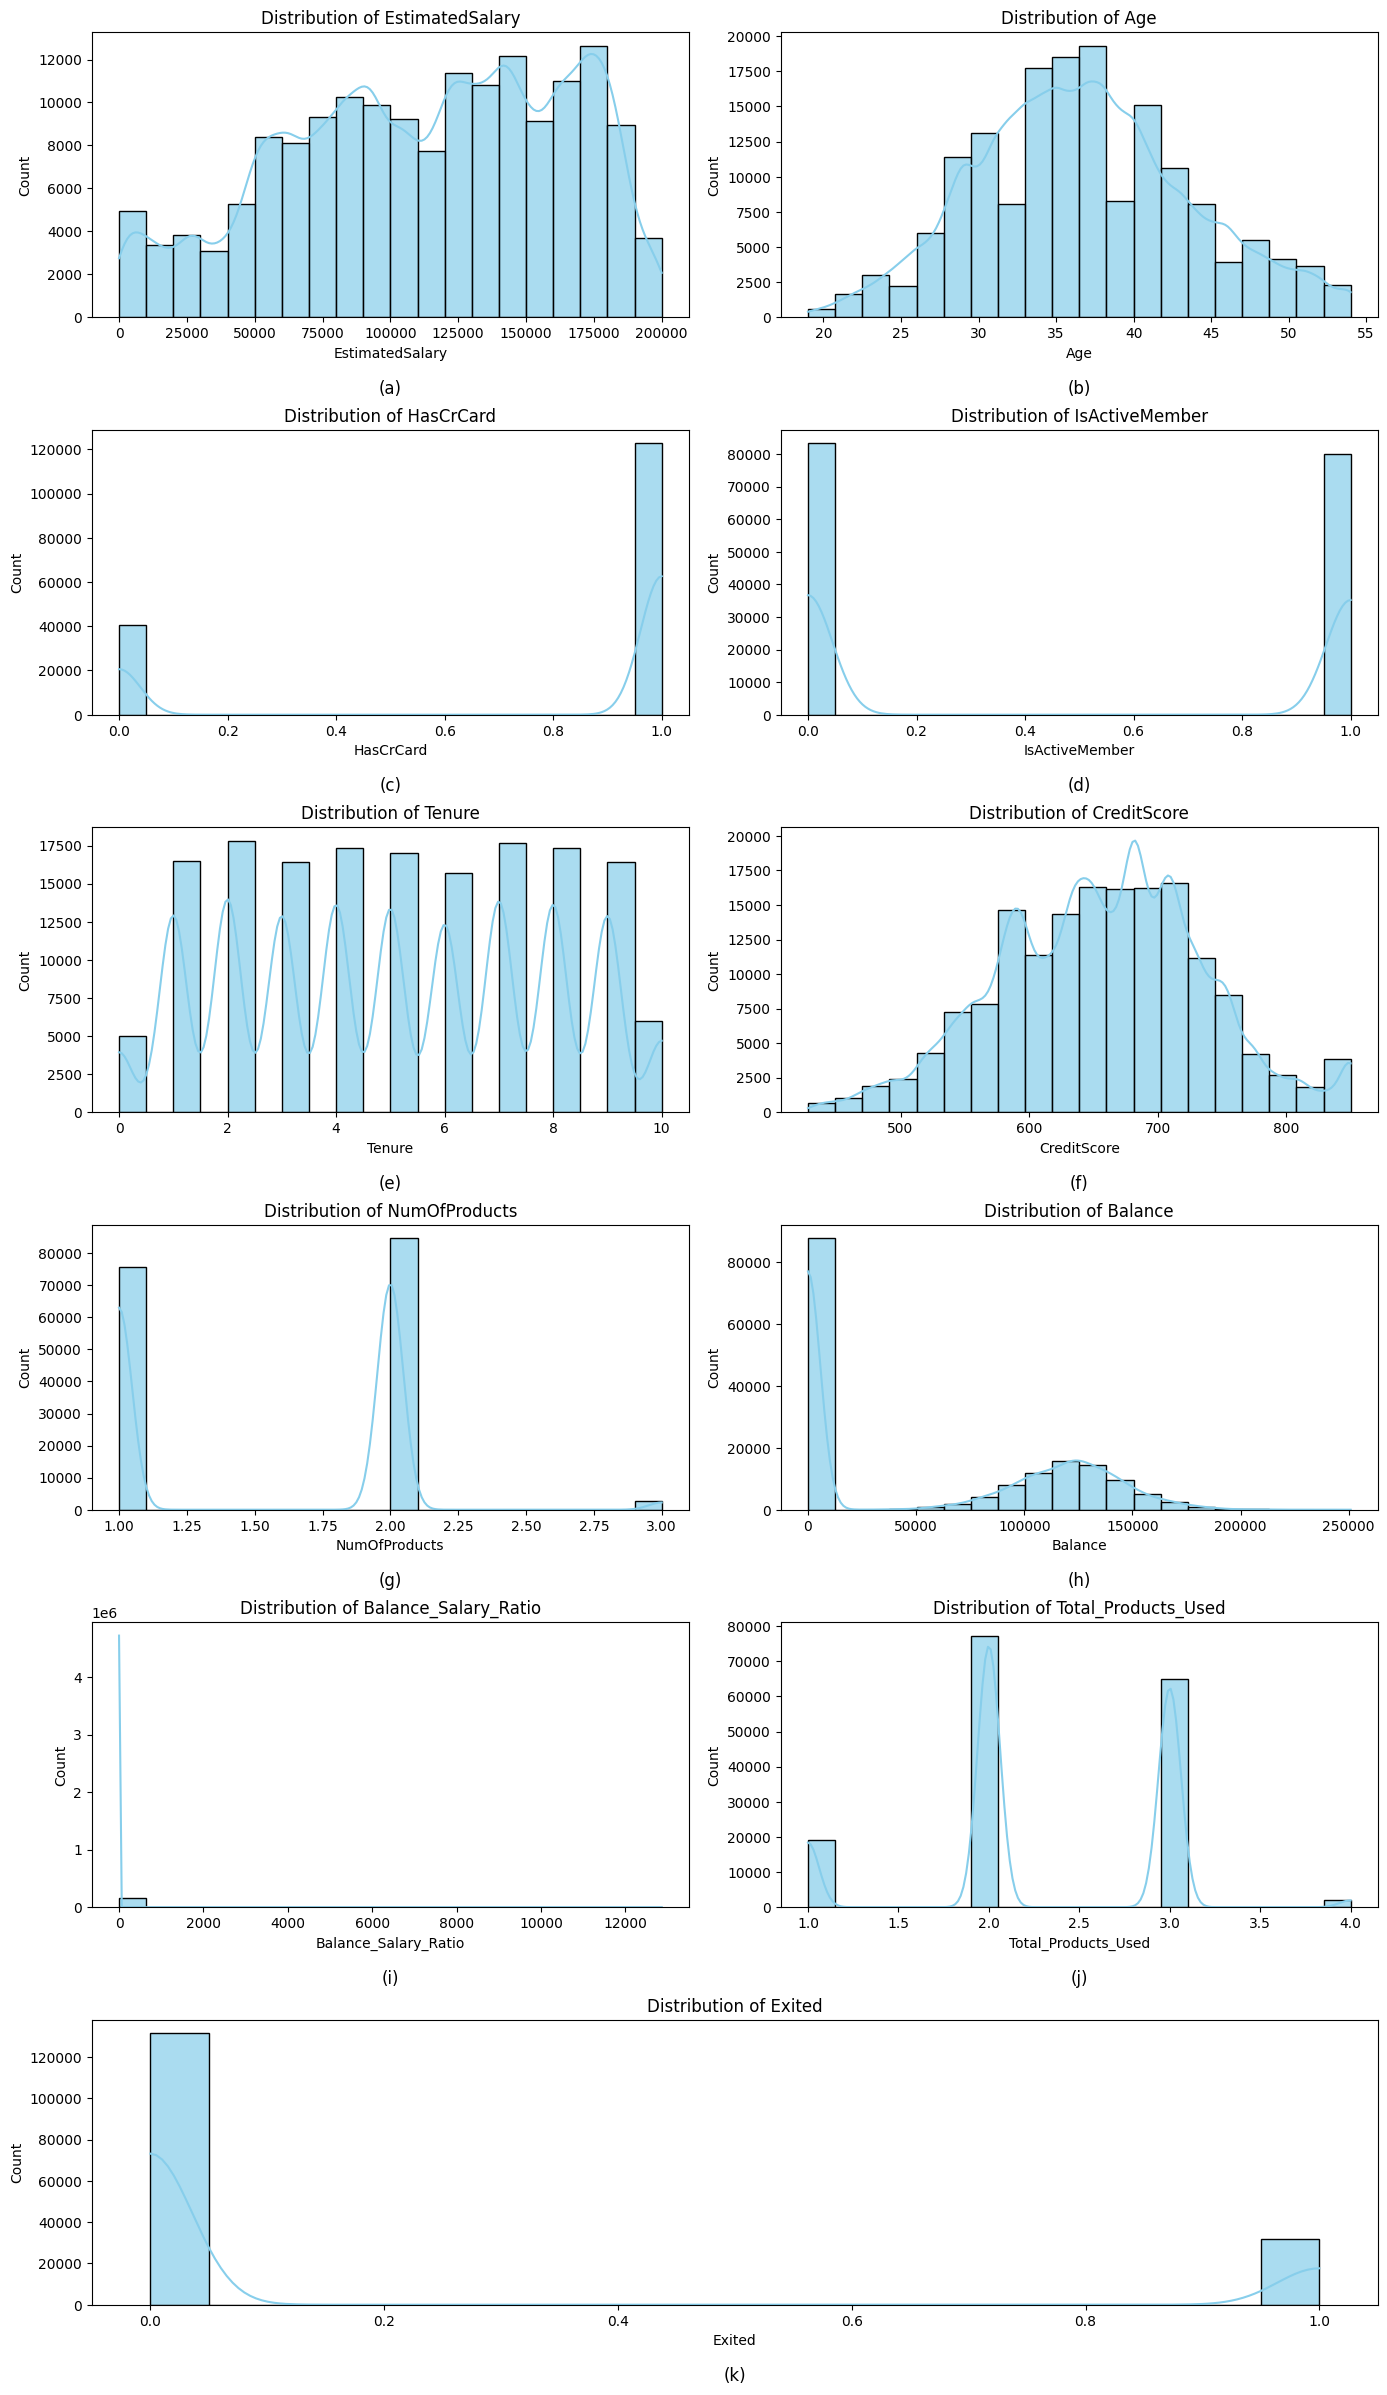

In [8]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()


if 'Exited' in num_cols:
    num_cols.remove('Exited')
    num_cols.append('Exited')

n = len(num_cols) - 1  

ncols = 2
nrows = math.ceil(n / ncols) + 1  

fig = plt.figure(figsize=(14, 4 * nrows))
gs = fig.add_gridspec(nrows, ncols)

# a, b, c...
labels = list(string.ascii_lowercase)

for i, col in enumerate(num_cols[:-1]):
    row = i // ncols
    col_idx = i % ncols
    ax = fig.add_subplot(gs[row, col_idx])
    sns.histplot(df[col], kde=True, bins=20,
                 color='skyblue', edgecolor='black', alpha=0.7, ax=ax)
    ax.set_title(f"Distribution of {col}")
    ax.set_xlabel(col)
    ax.set_ylabel("Count")

    # (a), (b), ...
    ax.text(0.5, -0.25, f"({labels[i]})", transform=ax.transAxes,
            ha='center', va='center', fontsize=12)

ax = fig.add_subplot(gs[-1, :])
sns.histplot(df['Exited'], kde=True, bins=20,
             color='skyblue', edgecolor='black', alpha=0.7, ax=ax)
ax.set_title("Distribution of Exited")
ax.set_xlabel("Exited")
ax.set_ylabel("Count")

ax.text(0.5, -0.25, f"({labels[len(num_cols)-1]})", transform=ax.transAxes,
        ha='center', va='center', fontsize=12)

plt.tight_layout()
plt.show()


# **Feature Transformation**
---

In [9]:
# Before transformed
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 163254 entries, 0 to 175033
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   EstimatedSalary       163254 non-null  float64 
 1   Age                   163254 non-null  float64 
 2   HasCrCard             163254 non-null  float64 
 3   IsActiveMember        163254 non-null  float64 
 4   Geography             163254 non-null  object  
 5   Exited                163254 non-null  int64   
 6   Gender                163254 non-null  object  
 7   Tenure                163254 non-null  int64   
 8   CreditScore           163254 non-null  int64   
 9   NumOfProducts         163254 non-null  int64   
 10  Balance               163254 non-null  float64 
 11  Age_Category          163254 non-null  category
 12  Credit_Score_Range    163254 non-null  category
 13  Balance_Salary_Ratio  163254 non-null  float64 
 14  Geo_Gender            163254 non-null  ob

In [10]:
ft = FeatureTransformation()
ft.fit(df)
df_transformed = ft.transform(df)

df_transformed.head()

,EstimatedSalary,Age,HasCrCard,IsActiveMember,Exited,Gender,Tenure,CreditScore,NumOfProducts,Balance,Balance_Salary_Ratio,Total_Products_Used,Geography_Germany,Geography_Spain,Age_Category_30-40,Age_Category_40-50,Age_Category_50-60,Credit_Score_Range_600-700,Credit_Score_Range_700-800,Credit_Score_Range_900+,Geo_Gender_France_Male,Geo_Gender_Germany_Female,Geo_Gender_Germany_Male,Geo_Gender_Spain_Female,Geo_Gender_Spain_Male,Tp_Gender_1.0_Male,Tp_Gender_2.0_Female,Tp_Gender_2.0_Male,Tp_Gender_3.0_Female,Tp_Gender_3.0_Male,Tp_Gender_4.0_Female,Tp_Gender_4.0_Male
0,0.419187,0.775327,1.0,1.0,1,0,-1.077126,-0.472781,1,0.000000,0.000000,2.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.476664,0.639450,0.0,1.0,0,0,-1.433231,-0.609318,1,0.569626,0.639318,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.484625,0.775327,1.0,0.0,1,0,1.059505,-1.916199,3,0.968303,0.843031,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.379766,0.363158,0.0,0.0,0,0,-1.433231,0.524901,2,0.000000,0.000000,2.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.277330,0.909758,1.0,1.0,0,0,-1.077126,2.428190,1,0.796515,0.872099,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [11]:
# After Transformed
df_transformed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 163254 entries, 0 to 175033
Data columns (total 32 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   EstimatedSalary             163254 non-null  float64
 1   Age                         163254 non-null  float64
 2   HasCrCard                   163254 non-null  float64
 3   IsActiveMember              163254 non-null  float64
 4   Exited                      163254 non-null  int64  
 5   Gender                      163254 non-null  int64  
 6   Tenure                      163254 non-null  float64
 7   CreditScore                 163254 non-null  float64
 8   NumOfProducts               163254 non-null  int64  
 9   Balance                     163254 non-null  float64
 10  Balance_Salary_Ratio        163254 non-null  float64
 11  Total_Products_Used         163254 non-null  float64
 12  Geography_Germany           163254 non-null  float64
 13  Geography_Spain    

# **Correlation Matrix**
---

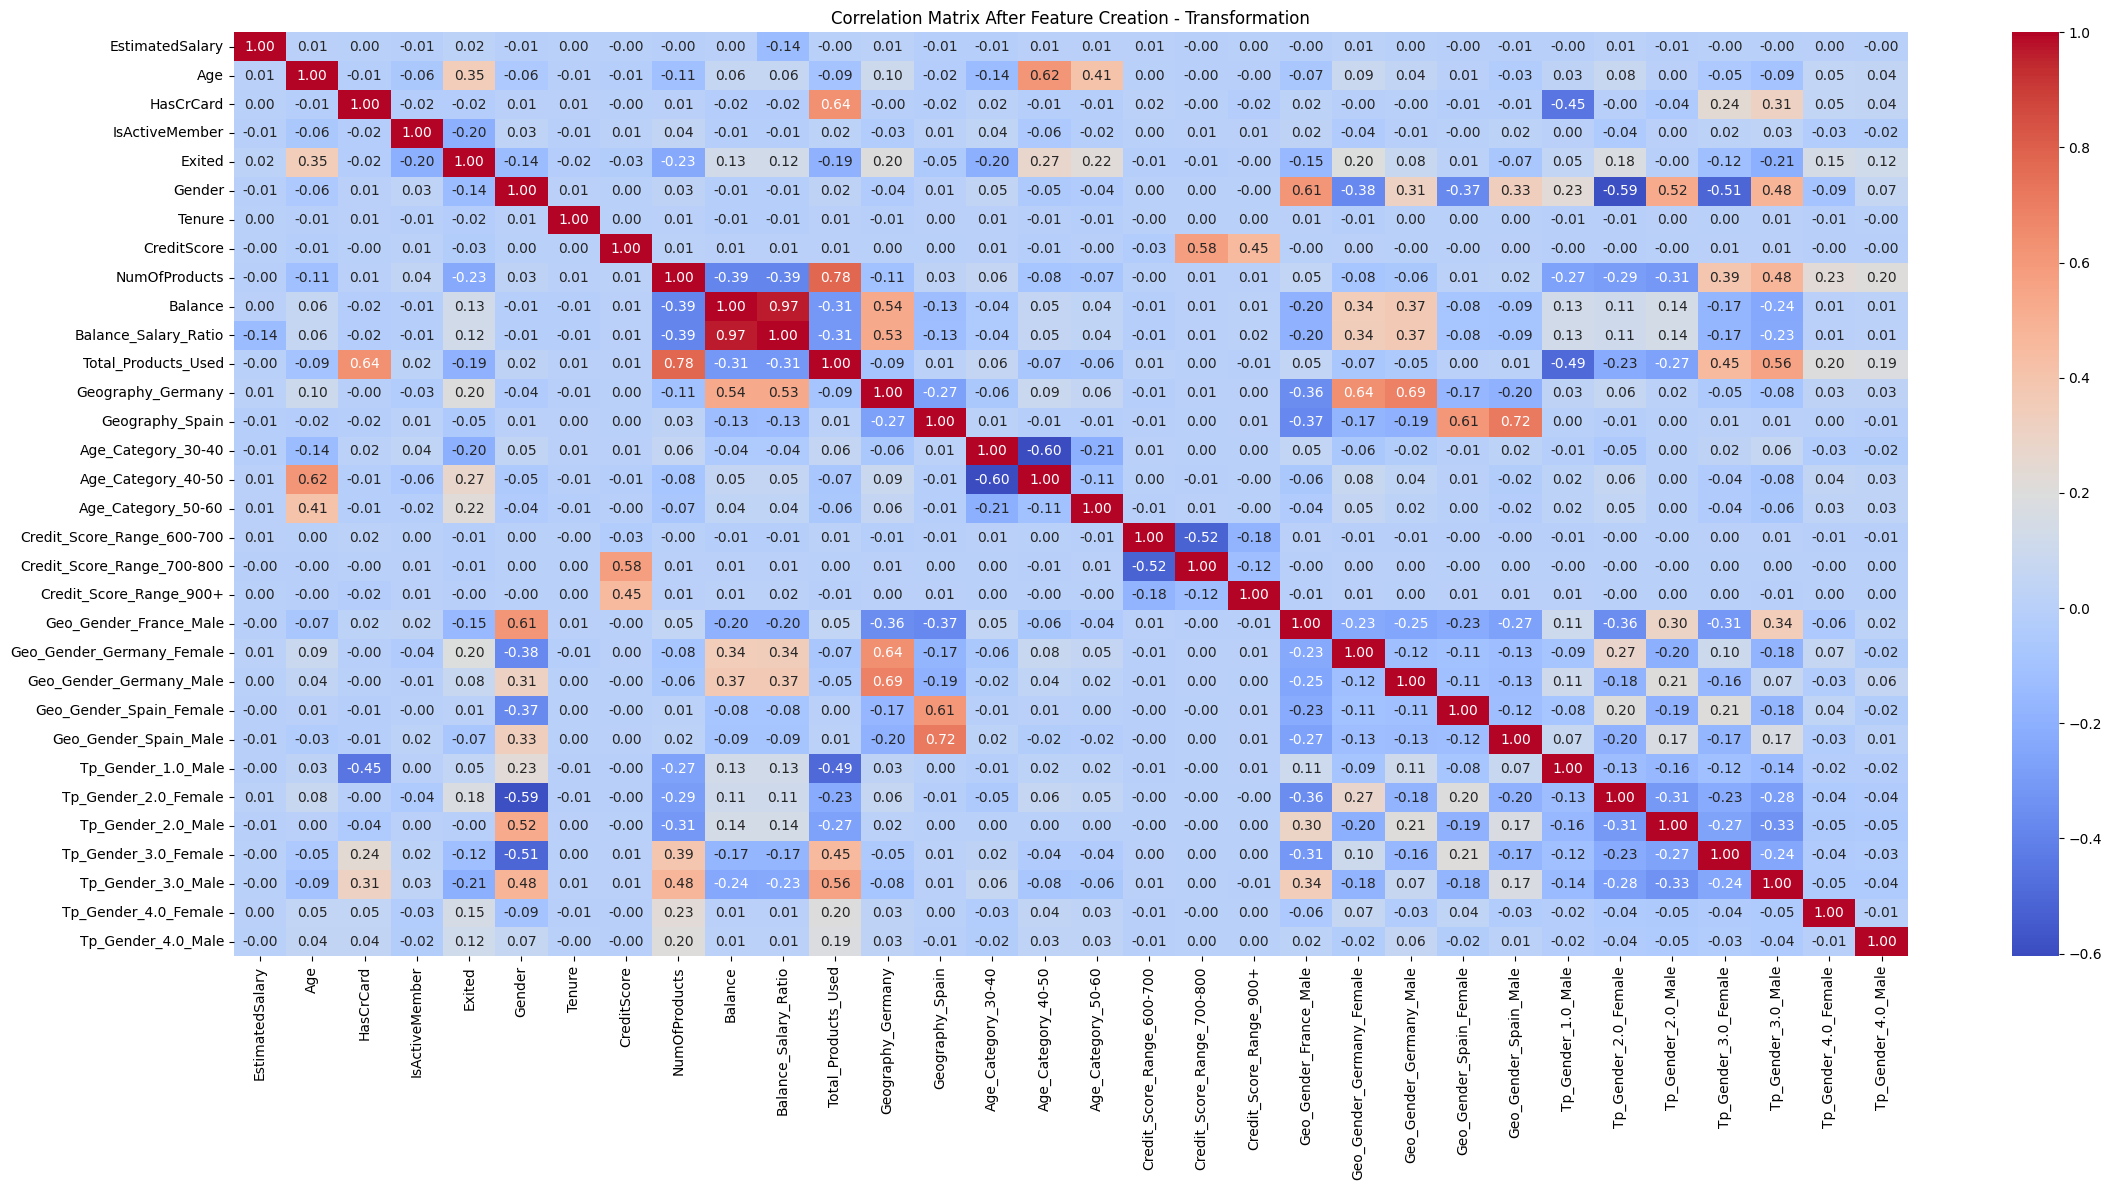

In [12]:
def plot_corr_matrices(df_before, df_after):
    num_after = df_after.select_dtypes(include=["number"])
    corr_after = num_after.corr()

    plt.figure(figsize=(27, 12))
    sns.heatmap(corr_after, annot=True, fmt=".2f", cmap="coolwarm")
    plt.title("Correlation Matrix After Feature Creation - Transformation")
    plt.show()

plot_corr_matrices(df, df_transformed)


# **Feature Selection**
---

In [ ]:
df_transformed = df_transformed.drop(['Gender', 'Age', 'NumOfProducts'], axis=1)

In [19]:
df_transformed = df_transformed.drop(['Geography_Germany', 'Geography_Spain', 'Total_Products_Used'], axis=1)

In [20]:
# --- BƯỚC 1: Dọn dẹp đa cộng tuyến ---
print("--- Bước 1: Loại bỏ đặc trưng tương quan cao ---")
selector_corr = FeatureSelection(method='correlation', threshold=0.95, target_col='Exited')
df_cleaned = selector_corr.fit_transform(df_transformed.copy())

print(f"\nKích thước sau khi dọn dẹp: {df_cleaned.shape}")
print("-"*50)

--- Bước 1: Loại bỏ đặc trưng tương quan cao ---
[Correlation] Dropping 1 features: ['Balance_Salary_Ratio']

Kích thước sau khi dọn dẹp: (163254, 25)
--------------------------------------------------


In [21]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 163254 entries, 0 to 175033
Data columns (total 25 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   EstimatedSalary             163254 non-null  float64
 1   HasCrCard                   163254 non-null  float64
 2   IsActiveMember              163254 non-null  float64
 3   Exited                      163254 non-null  int64  
 4   Tenure                      163254 non-null  float64
 5   CreditScore                 163254 non-null  float64
 6   Balance                     163254 non-null  float64
 7   Age_Category_30-40          163254 non-null  float64
 8   Age_Category_40-50          163254 non-null  float64
 9   Age_Category_50-60          163254 non-null  float64
 10  Credit_Score_Range_600-700  163254 non-null  float64
 11  Credit_Score_Range_700-800  163254 non-null  float64
 12  Credit_Score_Range_900+     163254 non-null  float64
 13  Geo_Gender_France_M

In [22]:
df_cleaned.head()

,EstimatedSalary,HasCrCard,IsActiveMember,Exited,Tenure,CreditScore,Balance,Age_Category_30-40,Age_Category_40-50,Age_Category_50-60,Credit_Score_Range_600-700,Credit_Score_Range_700-800,Credit_Score_Range_900+,Geo_Gender_France_Male,Geo_Gender_Germany_Female,Geo_Gender_Germany_Male,Geo_Gender_Spain_Female,Geo_Gender_Spain_Male,Tp_Gender_1.0_Male,Tp_Gender_2.0_Female,Tp_Gender_2.0_Male,Tp_Gender_3.0_Female,Tp_Gender_3.0_Male,Tp_Gender_4.0_Female,Tp_Gender_4.0_Male
0,0.419187,1.0,1.0,1,-1.077126,-0.472781,0.000000,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.476664,0.0,1.0,0,-1.433231,-0.609318,0.569626,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.484625,1.0,0.0,1,1.059505,-1.916199,0.968303,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.379766,0.0,0.0,0,-1.433231,0.524901,0.000000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.277330,1.0,1.0,0,-1.077126,2.428190,0.796515,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [23]:
# --- BƯỚC 2: Chọn lọc đặc trưng tốt nhất từ bộ đã dọn dẹp ---
print("\n--- Bước 2: Chọn top 20 đặc trưng tốt nhất ---")
selector_mi = FeatureSelection(method='mutual_info', k=20, target_col='Exited')
df_final_selected = selector_mi.fit_transform(df_cleaned.copy()) 

print(f"\nKích thước cuối cùng: {df_final_selected.shape}")


--- Bước 2: Chọn top 20 đặc trưng tốt nhất ---


[Mutual Info] Keeping 20 features, Dropping 4 features
Top features: ['Age_Category_40-50', 'Tp_Gender_3.0_Male', 'Age_Category_30-40', 'IsActiveMember', 'Age_Category_50-60']

Kích thước cuối cùng: (163254, 21)


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split

def check_dataset_ready(df, target_col="Exited"):
    print("\n=== Dataset Readiness Check ===")
    
    # 1. Shape
    print(f"Shape: {df.shape}")
    
    # 2. Split X, y
    X = df.drop(columns=[target_col])
    y = df[target_col]
    
    # 3. Missing values
    missing = X.isnull().sum().sum()
    print(f"Missing values total: {missing}")
    
    # 4. Data types
    print("\nDtypes count:")
    print(X.dtypes.value_counts())
    
    # 5. Target balance
    print("\nTarget distribution:")
    print(y.value_counts(normalize=True))
    
    # 6. Multicollinearity check (VIF)
    if X.shape[1] <= 30:  
        vif_data = pd.DataFrame()
        vif_data["feature"] = X.columns
        vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
        print("\nTop 10 VIF:")
        print(vif_data.sort_values("VIF", ascending=False).head(10))
    else:
        print("\n[VIF skipped] Too many features, consider PCA/regularization.")
    
    # 7. Scale check
    print("\nNumeric feature summary (first 10):")
    print(X.describe().T.head(10))
    
    # 8. Train-test split 
    try:
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42, stratify=y
        )
        print(f"\nTrain shape: {X_train.shape}, Test shape: {X_test.shape}")
    except Exception as e:
        print(f"Train-test split failed: {e}")
    
    return X, y

X, y = check_dataset_ready(df_final_selected, target_col="Exited")



=== Dataset Readiness Check ===
Shape: (163254, 21)
Missing values total: 0

Dtypes count:
float64    20
Name: count, dtype: int64

Target distribution:
Exited
0    0.805818
1    0.194182
Name: proportion, dtype: float64

Top 10 VIF:
                       feature       VIF
1                    HasCrCard  5.597259
0              EstimatedSalary  3.360508
6           Age_Category_30-40  3.013676
5                      Balance  2.805380
9   Credit_Score_Range_700-800  2.672159
16        Tp_Gender_3.0_Female  2.542924
11      Geo_Gender_France_Male  2.527299
4                  CreditScore  2.506447
15        Tp_Gender_2.0_Female  2.427239
17          Tp_Gender_3.0_Male  2.258501

Numeric feature summary (first 10):
                               count          mean       std       min  \
EstimatedSalary             163254.0  5.002453e-01  0.287669  0.000000   
HasCrCard                   163254.0  7.524594e-01  0.431585  0.000000   
IsActiveMember              163254.0  4.896297e-01  0.4